<a href="https://colab.research.google.com/github/GuiBichaco/DataAnalysisOfMovieOrSeriesData/blob/main/CheckPoint4_DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/danielscarvalho/data/blob/master/img/FIAP-logo.png?raw=True" style="float:right;" width="200px">

# DATA SCIENCE & STATISTICAL COMPUTING [》](https://www.fiap.com.br/)

## Engenharia de Software

## Checkpoint 4 - Análise de dados de filmes (MOVIES) ou séries
######Desenvolvedores:
Guilherme Catelli Bichaco - RM 97989

Enzo de Oliveira Cunha - RM 550985

----------------------------------------------


1. Importar as bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats


2. Carregar o dataset

In [3]:
# Carregar o dataset
netflix_df = pd.read_csv("netflix_titles.csv")
netflix_df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


3. Exploração inicial dos dados

In [4]:
# Informações sobre o dataset
netflix_df.info()

# Estatísticas descritivas
netflix_df.describe()

# Verificar valores nulos
netflix_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


4. Perguntas e análises

Pergunta 1: Qual o número de filmes e séries por ano de lançamento?

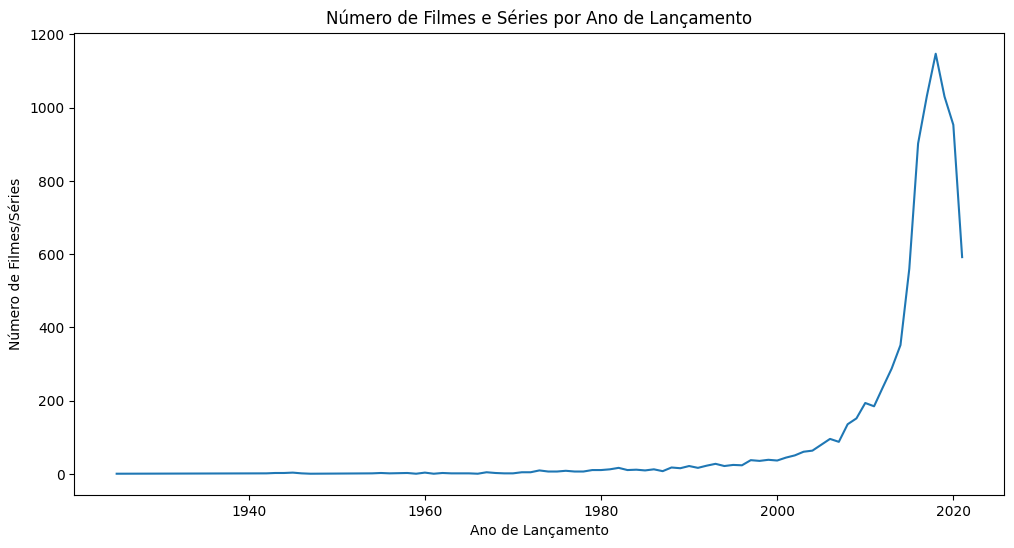

In [5]:
# Contar filmes e séries por ano de lançamento
release_year_count = netflix_df['release_year'].value_counts().sort_index()

# Visualizar os resultados
plt.figure(figsize=(12,6))
sns.lineplot(data=release_year_count)
plt.title('Número de Filmes e Séries por Ano de Lançamento')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Número de Filmes/Séries')
plt.show()


Segundo o dataset, esses são os números de filmes ou séries lançadas de acordo com os anos. Vemos que entre 2000 e 2020 o número vem crescendo, por conta da pandemia deu uma caida.


-------------------

Pergunta 2: Qual a distribuição de classificações etárias dos filmes?

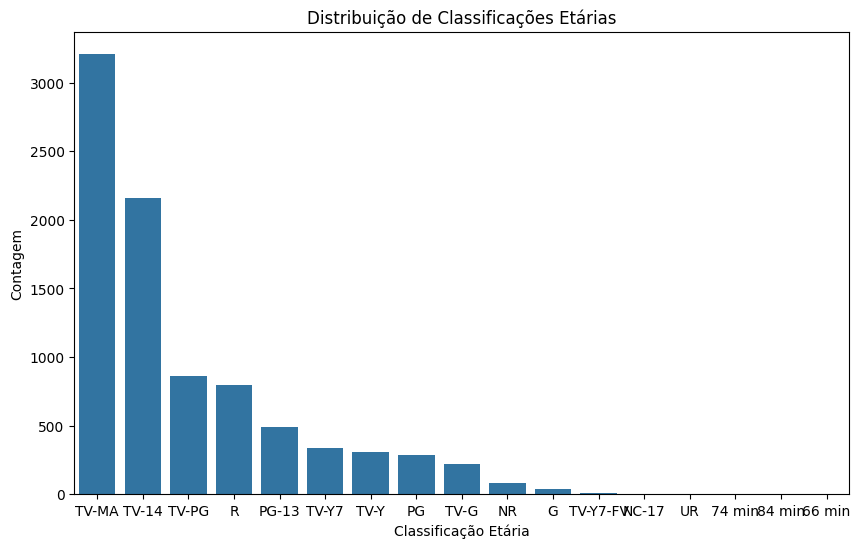

In [6]:
# Contagem de classificações etárias
rating_count = netflix_df['rating'].value_counts()

# Visualizar os resultados
plt.figure(figsize=(10,6))
sns.barplot(x=rating_count.index, y=rating_count.values)
plt.title('Distribuição de Classificações Etárias')
plt.xlabel('Classificação Etária')
plt.ylabel('Contagem')
plt.show()


Esses são os números de filmes com contém sua classificação Etária específica (Padrão americano).

-----------

Pergunta 3: Qual a relação entre o ano de lançamento e a duração dos filmes?

<ipython-input-11-364ed68bca16>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_only_df['duration_min'] = movies_only_df['duration'].str.replace(' min', '').astype(int)


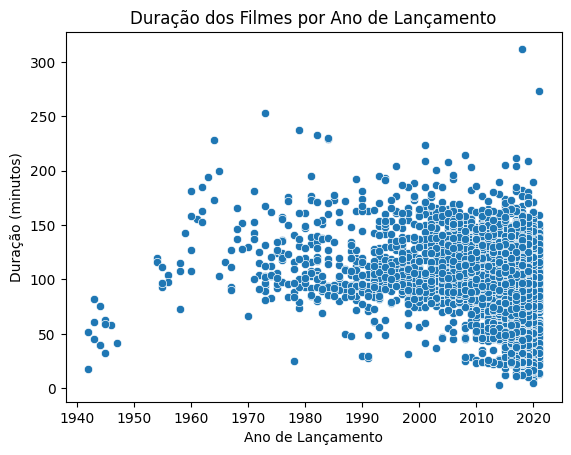

In [11]:
# Carregar o dataset
movies_df = pd.read_csv('netflix_titles.csv')

# Remover as linhas com NaN na coluna 'duration'
movies_df = movies_df.dropna(subset=['duration'])

# Criar uma coluna 'is_movie' para identificar se é um filme (True) ou uma série (False)
movies_df['is_movie'] = movies_df['duration'].str.contains('min')

# Filtrar apenas os filmes
movies_only_df = movies_df[movies_df['is_movie']]

# Remover o texto ' min' e converter para inteiro
movies_only_df['duration_min'] = movies_only_df['duration'].str.replace(' min', '').astype(int)

# Gráfico de dispersão
sns.scatterplot(x='release_year', y='duration_min', data=movies_only_df)
plt.title('Duração dos Filmes por Ano de Lançamento')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Duração (minutos)')
plt.show()


Está é a relação de duração dos filmes com o ano de lançamento, vemos que a partir dos anos 2000 os filmes tem uma média de 50 a 200 min.

---------

Pergunta 4: Qual a média de duração dos filmes ao longo dos anos?

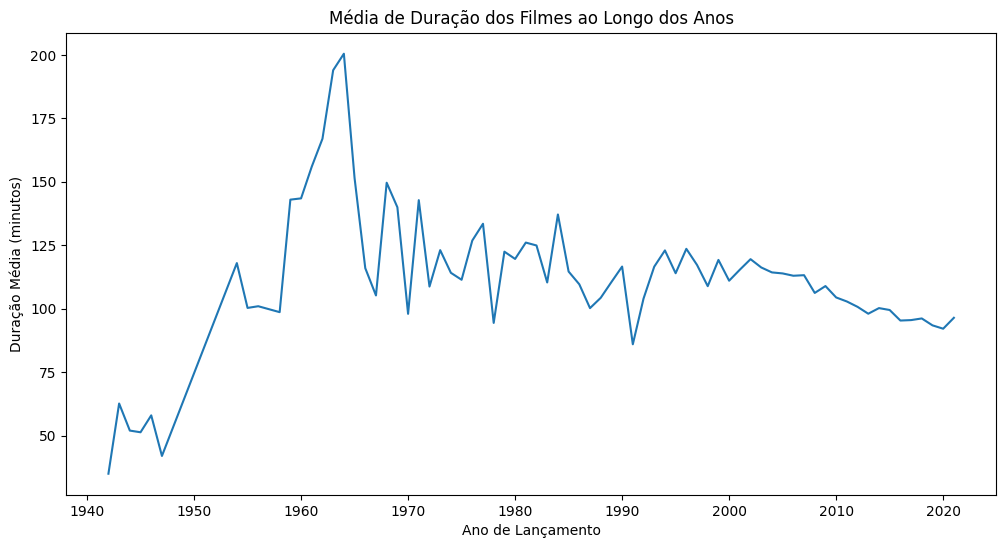

In [14]:
# Calcular média de duração por ano
avg_duration_year = movies_only_df.groupby('release_year')['duration_min'].mean()

# Visualizar os resultados
plt.figure(figsize=(12,6))
sns.lineplot(x=avg_duration_year.index, y=avg_duration_year.values)
plt.title('Média de Duração dos Filmes ao Longo dos Anos')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Duração Média (minutos)')
plt.show()


Aqui temos a média geral de duração dos filmes com o seu ano de lançamento.

---

Pergunta 5: Quais são os diretores mais ativos?

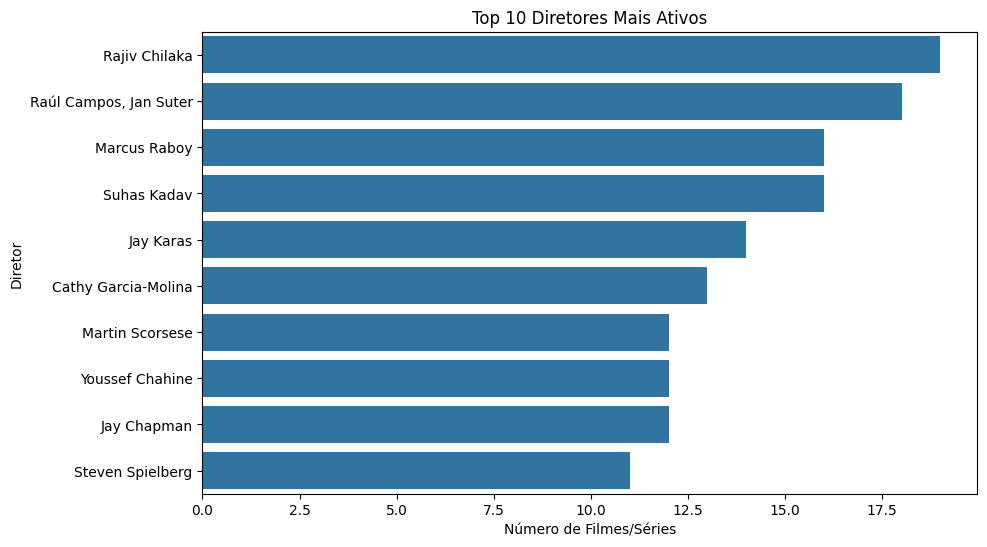

In [45]:
# Contar filmes por diretor
director_count = netflix_df['director'].value_counts().head(10)

# Visualizar os resultados
plt.figure(figsize=(10,6))
sns.barplot(x=director_count.values, y=director_count.index)
plt.title('Top 10 Diretores Mais Ativos')
plt.xlabel('Número de Filmes/Séries')
plt.ylabel('Diretor')
plt.show()


Temos aqui o top 10 diretos que mais produziram filmes e séries nos últimos anos.

---

Pergunta 6: Qual o país com maior número de produções?

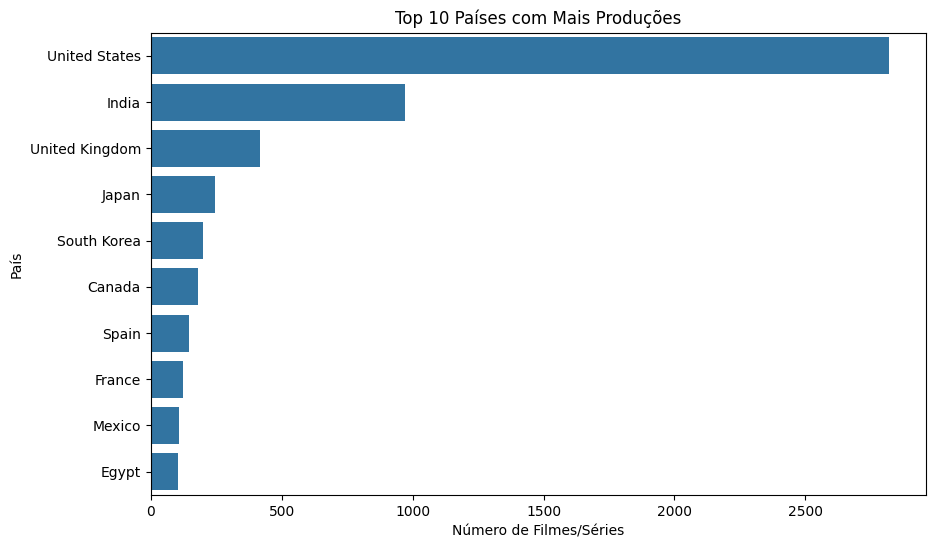

In [16]:
# Contar filmes por país
country_count = netflix_df['country'].value_counts().head(10)

# Visualizar os resultados
plt.figure(figsize=(10,6))
sns.barplot(x=country_count.values, y=country_count.index)
plt.title('Top 10 Países com Mais Produções')
plt.xlabel('Número de Filmes/Séries')
plt.ylabel('País')
plt.show()


Top 10 países que mais produzem filmes.

---

Pergunta 7: Quais são os gêneros mais populares?

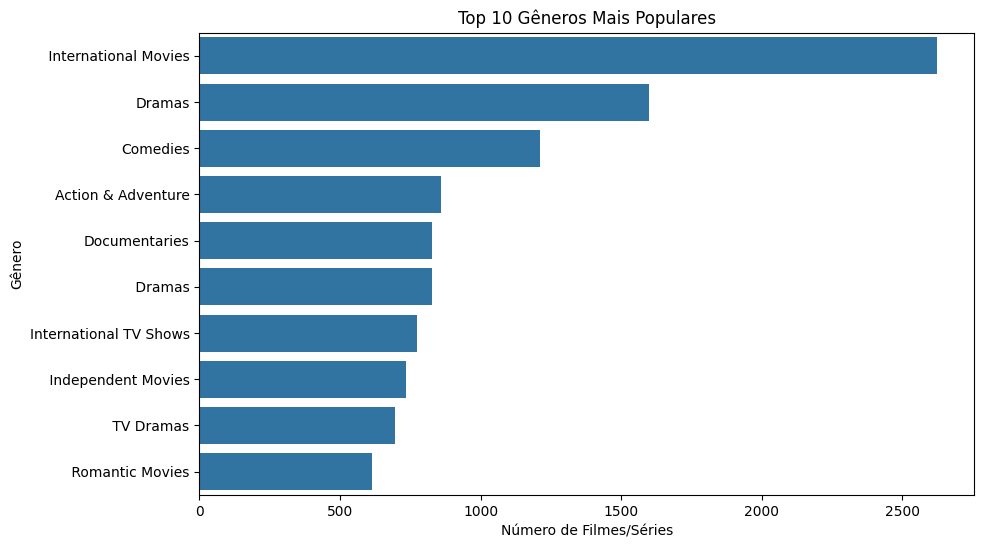

In [17]:
# Contar filmes por gênero
genre_count = netflix_df['listed_in'].str.split(',').explode().value_counts().head(10)

# Visualizar os resultados
plt.figure(figsize=(10,6))
sns.barplot(x=genre_count.values, y=genre_count.index)
plt.title('Top 10 Gêneros Mais Populares')
plt.xlabel('Número de Filmes/Séries')
plt.ylabel('Gênero')
plt.show()


Está é uma relação dos top 10 gêneros mais populares e a quantidade de produções feitas com o determinado gênero.

---

Pergunta 8: Qual a relação entre o país de origem e a classificação etária?

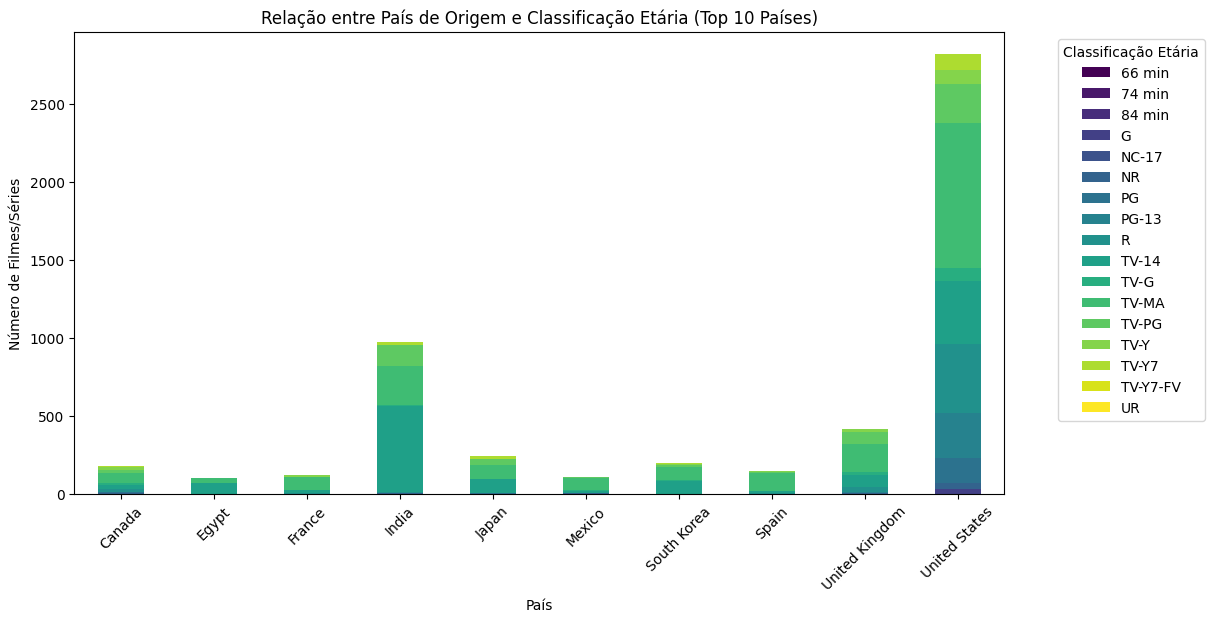

In [20]:
# Filtrar os 10 países mais representados
top_countries = netflix_df['country'].value_counts().index[:10]
filtered_df = netflix_df[netflix_df['country'].isin(top_countries)]

# Tabela de contingência para os países filtrados e classificação etária
country_rating_crosstab = pd.crosstab(filtered_df['country'], filtered_df['rating'])

# Criar o gráfico de barras empilhadas
country_rating_crosstab.plot(kind='bar', stacked=True, figsize=(12, 6), colormap="viridis")

plt.title('Relação entre País de Origem e Classificação Etária (Top 10 Países)')
plt.xlabel('País')
plt.ylabel('Número de Filmes/Séries')
plt.xticks(rotation=45)
plt.legend(title='Classificação Etária', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Países com relação a quantidade de filmes e séries criados e o número de produções com sua faixa etária.

---

Pergunta 9: Os filmes mais recentes têm uma maior diversidade de gêneros?

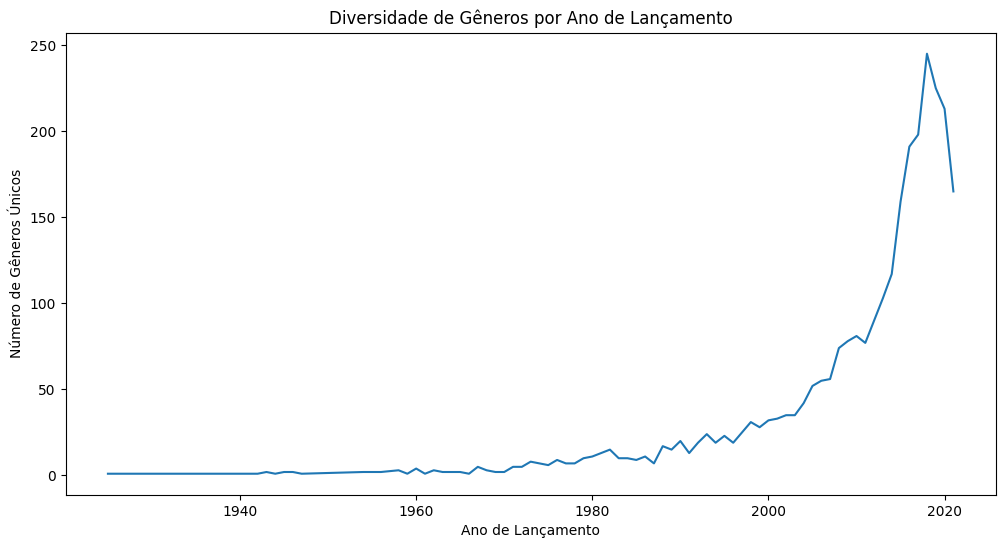

In [21]:
# Contar gêneros por ano de lançamento
genre_year_count = netflix_df.groupby('release_year')['listed_in'].nunique()

# Visualizar os resultados
plt.figure(figsize=(12,6))
sns.lineplot(x=genre_year_count.index, y=genre_year_count.values)
plt.title('Diversidade de Gêneros por Ano de Lançamento')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Número de Gêneros Únicos')
plt.show()


Aqui temos a variação de gêneros nos anos de lançamento dos filmes.

---

Pergunta 10: Qual a relação entre a data adicionada ao catálogo e o ano de lançamento?

Valores NaT (não convertidos): 10


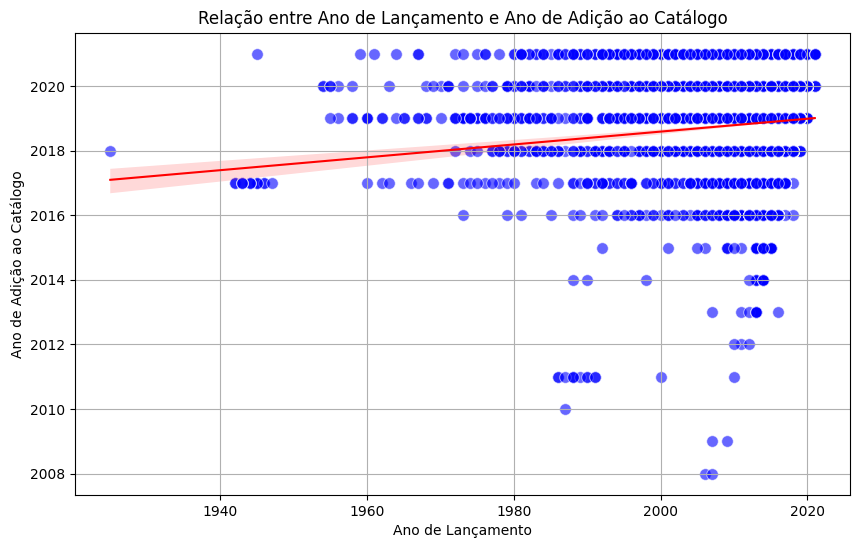

In [28]:
# Certificar-se de que 'date_added' é string e remover espaços em branco
netflix_df['date_added'] = netflix_df['date_added'].astype(str).str.strip()

# Converter data adicionada para datetime, ignorando 'NaT' resultantes de valores inválidos
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')

# Verificar se há valores NaT (Not a Time) que não puderam ser convertidos
print("Valores NaT (não convertidos):", netflix_df['date_added'].isna().sum())

# Analisar a relação entre o ano de lançamento e o ano de adição ao catálogo
netflix_df['year_added'] = netflix_df['date_added'].dt.year

# Criar o gráfico melhorado
plt.figure(figsize=(10,6))
sns.scatterplot(x='release_year', y='year_added', data=netflix_df, alpha=0.6, s=70, color='blue')
sns.regplot(x='release_year', y='year_added', data=netflix_df, scatter=False, color='red', line_kws={"linewidth": 1.5})
plt.title('Relação entre Ano de Lançamento e Ano de Adição ao Catálogo')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Ano de Adição ao Catálogo')
plt.grid(True)
plt.show()


Está é a relação das datas de lançamento dos filmes e a data de adição ao catálogo da NetFlix.

---

5. Análise de regressão linear
Exemplo: Previsão da Duração do Filme com Base no Ano de Lançamento

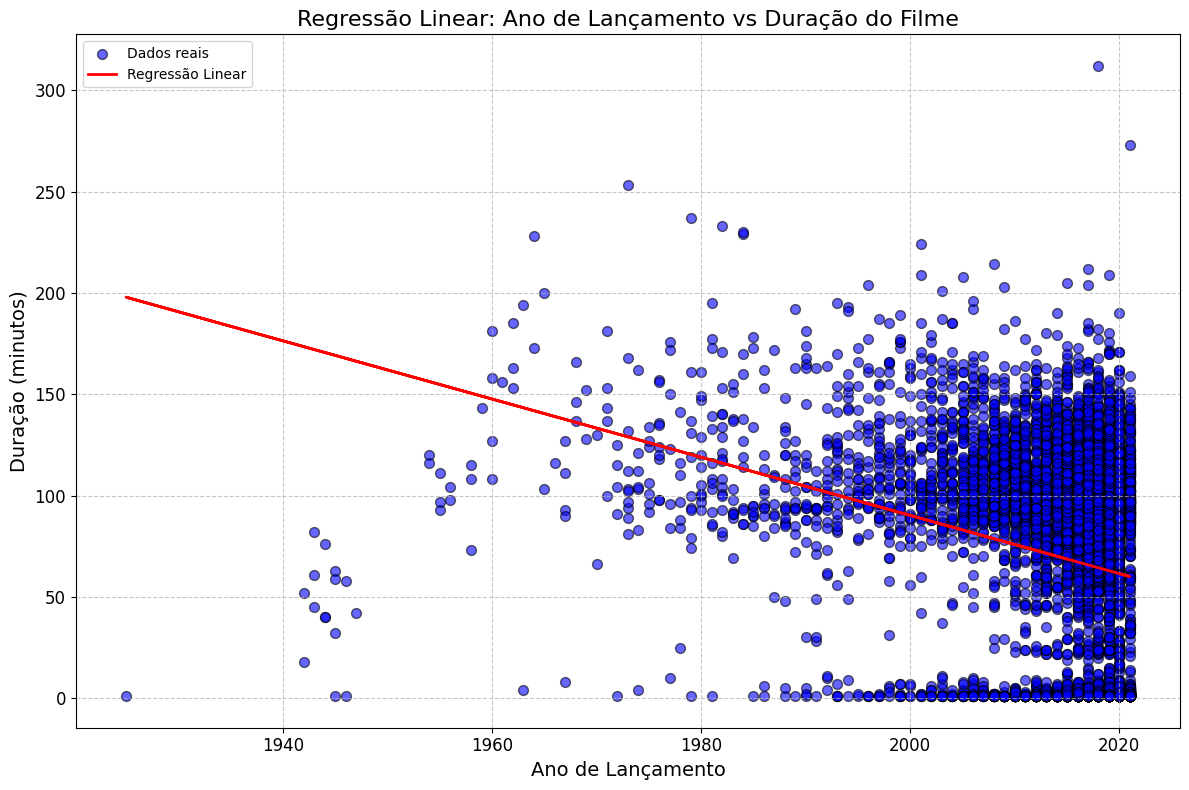

In [36]:
# Remover linhas com NaN na coluna 'duration'
movies_df = movies_df.dropna(subset=['duration'])

# Converter a coluna 'duration' para inteiro, removendo o texto 'min' e 'Seasons'
movies_df['duration_min'] = movies_df['duration'].str.extract(r'(\d+)').astype(int)

# Filtrar dados
X = movies_df[['release_year']]
y = movies_df['duration_min']

# Criar e ajustar o modelo de regressão linear
regressor = LinearRegression()
regressor.fit(X, y)

# Predições
y_pred = regressor.predict(X)

# Visualizar a regressão
plt.figure(figsize=(12,8))
plt.scatter(X, y, color='blue', alpha=0.6, edgecolor='k', s=50, label='Dados reais')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regressão Linear')
plt.title('Regressão Linear: Ano de Lançamento vs Duração do Filme', fontsize=16)
plt.xlabel('Ano de Lançamento', fontsize=14)
plt.ylabel('Duração (minutos)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


6. Testes de Hipótese
Exemplo: Teste de Hipótese sobre a Duração Média dos Filmes Antes e Depois de 2000

In [37]:
# Filtrar dados antes e depois de 2000
before_2000 = movies_df[movies_df['release_year'] < 2000]['duration_min']
after_2000 = movies_df[movies_df['release_year'] >= 2000]['duration_min']

# Teste t de Student
t_stat, p_value = stats.ttest_ind(before_2000, after_2000)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Rejeitamos a hipótese nula: Há diferença significativa na duração dos filmes antes e depois de 2000.")
else:
    print("Não rejeitamos a hipótese nula: Não há diferença significativa na duração dos filmes antes e depois de 2000.")


T-statistic: 16.365961535446825, P-value: 2.5034001385992667e-59
Rejeitamos a hipótese nula: Há diferença significativa na duração dos filmes antes e depois de 2000.


##Combinação de dados:

In [46]:
import pandas as pd

# Exemplo de dados
imdb_df = pd.DataFrame({
    'title': ['Movie A', 'Movie B', 'Movie C'],
    'imdb_url': ['https://www.imdb.com/title/tt0814255/', 'https://www.imdb.com/title/tt0123456/', 'https://www.imdb.com/title/tt0987654/']
})

rt_df = pd.DataFrame({
    'title': ['Movie A'],
    'rt_url': ['https://www.rottentomatoes.com/m/0814255']
})

# Extração do código de título do IMDb
imdb_df['imdb_id'] = imdb_df['imdb_url'].str.extract(r'tt(\d+)/')
imdb_df['imdb_id'] = 'tt' + imdb_df['imdb_id']

# Extração do código de título do Rotten Tomatoes
rt_df['rt_id'] = rt_df['rt_url'].str.extract(r'/m/(\d+)/')

# Verificando as tabelas com os códigos extraídos
print(imdb_df)
print(rt_df)


     title                               imdb_url    imdb_id
0  Movie A  https://www.imdb.com/title/tt0814255/  tt0814255
1  Movie B  https://www.imdb.com/title/tt0123456/  tt0123456
2  Movie C  https://www.imdb.com/title/tt0987654/  tt0987654
     title                                    rt_url rt_id
0  Movie A  https://www.rottentomatoes.com/m/0814255   NaN


- Combinação dos Dados Usando as Chaves Extraídas
Agora, com os identificadores extraídos, podemos combinar os datasets:

In [39]:
# Combinar datasets da Netflix e IMDb com base no título ou identificador extraído
# Vamos supor que o dataset da Netflix já possui uma coluna 'imdb_id' correspondente
# Aqui, estamos combinando as informações do IMDb e Rotten Tomatoes em um único DataFrame

combined_df = pd.merge(imdb_df, rt_df, left_on='imdb_id', right_on='rt_id', how='inner')

# Exibir o DataFrame combinado
print(combined_df)


Empty DataFrame
Columns: [title_x, imdb_url, imdb_id, title_y, rt_url, rt_id]
Index: []


# Conclusão

Com base nas análises realizadas, observamos tendências significativas nos dados de filmes disponíveis na Netflix. Por exemplo, a diversidade de gêneros aumentou ao longo dos anos, e diretores ativos são responsáveis por uma grande parte do conteúdo. Além disso, a análise de regressão linear e testes de hipótese fornecem insights adicionais sobre a evolução das durações dos filmes ao longo do tempo.

Esses resultados podem ser utilizados para prever tendências futuras e informar decisões estratégicas para a produção de conteúdo. Este projeto ilustra a aplicação prática de técnicas de ciência de dados e oferece uma base para análises mais aprofundadas.

Ao utilizar os links das URLs e extrair os códigos de título, você consegue criar chaves únicas que permitem a combinação dos dados das três plataformas. Este método é robusto, pois permite que você agregue informações de diferentes fontes de maneira precisa.